In [36]:
import pandas as pd
import yfinance as yf

In [82]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 4.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 5.0 MB/s eta 0:00:0000:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 2.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
# creating a dataframe
dicionario = {
    "empresa": ['Weg', 'Petrobras', 'Vale'],
    "Cotações": [20, 30, 50.3],
}

df = pd.DataFrame(dicionario)
display(df)

,empresa,Cotações
0,Weg,20.0
1,Petrobras,30.0
2,Vale,50.3


In [38]:
# push data from yahoo finance with yfinance

dados_empresa = yf.download("GOAU4.SA", start= '2020-01-01', end='2024-03-31')
display(dados_empresa)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,9.37,9.76,9.31,9.68,6.063440,11988800
2020-01-03,9.41,9.70,9.39,9.70,6.075969,15648300
2020-01-06,9.60,9.71,9.38,9.65,6.044648,11752900
2020-01-07,9.61,9.79,9.54,9.72,6.088495,12266000
2020-01-08,9.70,9.77,9.57,9.66,6.050912,10127800
...,...,...,...,...,...,...
2024-03-22,10.22,10.22,10.02,10.07,10.070000,3816100
2024-03-25,10.07,10.14,10.01,10.07,10.070000,4336000
2024-03-26,10.05,10.09,9.96,10.06,10.060000,5919000


In [39]:
# selecting a column

dados_ajustados = dados_empresa['Adj Close']
display(dados_ajustados)

Date
2020-01-02     6.063440
2020-01-03     6.075969
2020-01-06     6.044648
2020-01-07     6.088495
2020-01-08     6.050912
                ...    
2024-03-22    10.070000
2024-03-25    10.070000
2024-03-26    10.060000
2024-03-27    10.210000
2024-03-28    10.290000
Name: Adj Close, Length: 1054, dtype: float64

Selecting an especific data in a dataframe with:

Loc: an operator that you'll use with names
Iloc: an operator tha you'll use with numbers (array)


In [40]:
dados_empresa.loc["2024-01-10", "Adj Close"]

dados_empresa.iloc[1, 4]

# return the last row in dataframe
dados_empresa.iloc[-1,:]




Open              10.20
High              10.33
Low               10.11
Close             10.29
Adj Close         10.29
Volume       5098500.00
Name: 2024-03-28 00:00:00, dtype: float64

In [41]:
cotacoes_ajustadas = dados_empresa["Adj Close"]
 
retornos_diarios = cotacoes_ajustadas.pct_change().dropna()

retornos_diarios

Date
2020-01-03    0.002066
2020-01-06   -0.005155
2020-01-07    0.007254
2020-01-08   -0.006173
2020-01-09    0.001035
                ...   
2024-03-22   -0.015640
2024-03-25    0.000000
2024-03-26   -0.000993
2024-03-27    0.014910
2024-03-28    0.007835
Name: Adj Close, Length: 1053, dtype: float64

How to readapt a time series

In [47]:
cotacoes_mensais = cotacoes_ajustadas.resample("M").last().dropna()

retorno_trimestral = cotacoes_mensais.pct_change(periods=3).dropna()

display(retorno_trimestral)

/var/folders/h3/hg0brw_s1mb4rb20y5dzl_sw0000gn/T/ipykernel_9089/3726922415.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cotacoes_mensais = cotacoes_ajustadas.resample("M").last().dropna()


Date
2020-04-30   -0.458238
2020-05-31   -0.221942
2020-06-30    0.572043
2020-07-31    0.561165
2020-08-31    0.424635
2020-09-30    0.285910
2020-10-31    0.218905
2020-11-30    0.175366
2020-12-31    0.216031
2021-01-31    0.095958
2021-02-28    0.137839
2021-03-31    0.198662
2021-04-30    0.413642
2021-05-31    0.305920
2021-06-30    0.045597
2021-07-31   -0.027775
2021-08-31   -0.109712
2021-09-30   -0.068477
2021-10-31   -0.089381
2021-11-30   -0.031908
2021-12-31    0.059430
2022-01-31    0.069369
2022-02-28   -0.022535
2022-03-31    0.086713
2022-04-30   -0.009598
2022-05-31    0.211080
2022-06-30   -0.201332
2022-07-31   -0.076684
2022-08-31   -0.153860
2022-09-30    0.147212
2022-10-31    0.137700
2022-11-30    0.428176
2022-12-31    0.273848
2023-01-31    0.339644
2023-02-28   -0.081081
2023-03-31   -0.080269
2023-04-30   -0.188579
2023-05-31   -0.076991
2023-06-30    0.026355
2023-07-31    0.211348
2023-08-31    0.077767
2023-09-30   -0.035793
2023-10-31   -0.232089
2023-1

Reading an excel file with pandas

In [54]:
dados_pl = pd.read_excel('dados_pl.xlsx')

display(dados_pl)

,codigo,empresa,preco,quant_acoes,lucro_liquido
0,AALR3,ALLIAR,14.97,118292816,-128836000
1,ABCB4,ABC BRASIL,15.87,226090118,763129000
2,ABEV3,AMBEV S/A,15.42,15741455000,13554865000
3,AERI3,AERIS,6.55,766213456,-35173000
4,AESB3,AES BRASIL,11.07,399106517,102568000
...,...,...,...,...,...
398,WHRL4,WHIRLPOOL,8.00,1502786000,543169000
399,WIZS3,WIZ S.A.,7.96,159907282,218528000
400,WLMM4,WLM IND COM,39.84,36414670,113400000
401,YDUQ3,YDUQS PART,20.56,309089000,-45505000


In [56]:
dados_pl['lpa'] = dados_pl['lucro_liquido']/dados_pl['quant_acoes']

dados_pl

,codigo,empresa,preco,quant_acoes,lucro_liquido,lpa
0,AALR3,ALLIAR,14.97,118292816,-128836000,-1.089128
1,ABCB4,ABC BRASIL,15.87,226090118,763129000,3.375331
2,ABEV3,AMBEV S/A,15.42,15741455000,13554865000,0.861094
3,AERI3,AERIS,6.55,766213456,-35173000,-0.045905
4,AESB3,AES BRASIL,11.07,399106517,102568000,0.256994
...,...,...,...,...,...,...
398,WHRL4,WHIRLPOOL,8.00,1502786000,543169000,0.361441
399,WIZS3,WIZ S.A.,7.96,159907282,218528000,1.366592
400,WLMM4,WLM IND COM,39.84,36414670,113400000,3.114130
401,YDUQ3,YDUQS PART,20.56,309089000,-45505000,-0.147223


In [57]:
dados_pl['p_l'] = dados_pl['preco']/dados_pl['lpa']
dados_pl

,codigo,empresa,preco,quant_acoes,lucro_liquido,lpa,p_l
0,AALR3,ALLIAR,14.97,118292816,-128836000,-1.089128,-13.744943
1,ABCB4,ABC BRASIL,15.87,226090118,763129000,3.375331,4.701761
2,ABEV3,AMBEV S/A,15.42,15741455000,13554865000,0.861094,17.907462
3,AERI3,AERIS,6.55,766213456,-35173000,-0.045905,-142.686098
4,AESB3,AES BRASIL,11.07,399106517,102568000,0.256994,43.074927
...,...,...,...,...,...,...,...
398,WHRL4,WHIRLPOOL,8.00,1502786000,543169000,0.361441,22.133605
399,WIZS3,WIZ S.A.,7.96,159907282,218528000,1.366592,5.824709
400,WLMM4,WLM IND COM,39.84,36414670,113400000,3.114130,12.793302
401,YDUQ3,YDUQS PART,20.56,309089000,-45505000,-0.147223,-139.652123


In [67]:
empresas_lucrativas = dados_pl[(dados_pl['p_l'] > 0) &
                                (dados_pl['p_l'] < 10)]

empresas_lucrativas

,codigo,empresa,preco,quant_acoes,lucro_liquido,lpa,p_l
1,ABCB4,ABC BRASIL,15.87,226090118,763129000,3.375331,4.701761
5,AFLT3,AFLUENTE T,8.87,63085000,119734000,1.897979,4.673392
6,AGRO3,BRASILAGRO,28.79,102377008,454231000,4.436846,6.488844
16,ALUP3,ALUPAR,8.09,879111269,1713489000,1.949115,4.150602
17,ALUP4,ALUPAR,8.04,879111269,1713489000,1.949115,4.124949
...,...,...,...,...,...,...,...
382,USIM3,USIMINAS,14.51,1253079108,5419779000,4.325169,3.354782
383,USIM5,USIMINAS,15.16,1253079108,5419779000,4.325169,3.505065
384,VALE3,VALE,77.96,5132458000,107423956000,20.930314,3.724741
393,VULC3,VULCABRAS,9.14,245756000,336850000,1.370668,6.668279


In [69]:
melhores_empresas = empresas_lucrativas.sort_values('p_l')

melhores_empresas

,codigo,empresa,preco,quant_acoes,lucro_liquido,lpa,p_l
238,MEGA3,OMEGAENERGIA,12.65,100,598231000,5.982310e+06,0.000002
340,SLED4,SARAIVA LIVR,6.21,1811720,152670000,8.426799e+01,0.073693
276,PDGR3,PDG REALT,1.36,56133000,623029000,1.109916e+01,0.122532
339,SLED3,SARAIVA LIVR,13.66,1811720,152670000,8.426799e+01,0.162102
200,INEP4,INEPAR,1.50,165301000,1105465000,6.687588e+00,0.224296
...,...,...,...,...,...,...,...
375,TTEN3,3TENTOS,9.73,494118000,514212000,1.040666e+00,9.349778
149,ENGI3,ENERGISA,13.67,1814561910,2627742000,1.448141e+00,9.439687
72,BRSR5,BANRISUL,16.80,408974000,711632000,1.740042e+00,9.654939
124,CXSE3,CAIXA SEGURI,8.36,3000000000,2549801000,8.499337e-01,9.836062


In [71]:
# rankings no pandas

melhores_empresas['Ranking_pl'] = melhores_empresas['p_l'].rank()

melhores_empresas

,codigo,empresa,preco,quant_acoes,lucro_liquido,lpa,p_l,Ranking_pl
238,MEGA3,OMEGAENERGIA,12.65,100,598231000,5.982310e+06,0.000002,1.0
340,SLED4,SARAIVA LIVR,6.21,1811720,152670000,8.426799e+01,0.073693,2.0
276,PDGR3,PDG REALT,1.36,56133000,623029000,1.109916e+01,0.122532,3.0
339,SLED3,SARAIVA LIVR,13.66,1811720,152670000,8.426799e+01,0.162102,4.0
200,INEP4,INEPAR,1.50,165301000,1105465000,6.687588e+00,0.224296,5.0
...,...,...,...,...,...,...,...,...
375,TTEN3,3TENTOS,9.73,494118000,514212000,1.040666e+00,9.349778,158.0
149,ENGI3,ENERGISA,13.67,1814561910,2627742000,1.448141e+00,9.439687,159.0
72,BRSR5,BANRISUL,16.80,408974000,711632000,1.740042e+00,9.654939,160.0
124,CXSE3,CAIXA SEGURI,8.36,3000000000,2549801000,8.499337e-01,9.836062,161.0


In [80]:
media_movel = pd.DataFrame(index= cotacoes_ajustadas.index)

media_movel['cotacoes_GOAU4'] = cotacoes_ajustadas.values

media_movel['media_movel_devagar'] = media_movel['cotacoes_GOAU4'].rolling(200).mean()

media_movel['media_movel_rapida'] = media_movel['cotacoes_GOAU4'].rolling(50).mean()

media_movel = media_movel.dropna()

media_movel


,cotacoes_GOAU4,media_movel_devagar,media_movel_rapida
Date,,,
2020-10-19,6.373878,4.825640,5.774922
2020-10-20,6.430394,4.827475,5.801799
2020-10-21,6.480632,4.829498,5.825410
2020-10-22,6.512032,4.831835,5.851283
2020-10-23,6.524590,4.834015,5.877281
...,...,...,...
2024-03-22,10.070000,10.472832,9.936703
2024-03-25,10.070000,10.470706,9.939864
2024-03-26,10.060000,10.468575,9.943025


<Axes: xlabel='Date'>

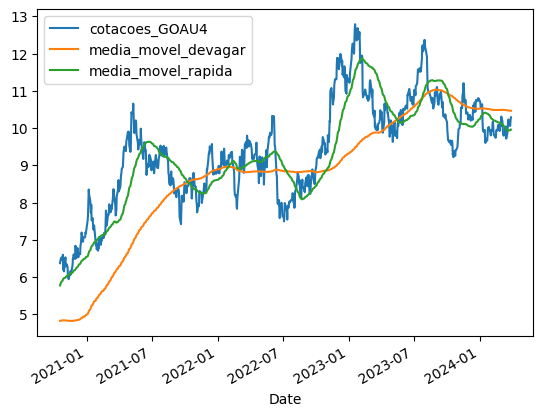

In [83]:
media_movel.plot()